In [19]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [20]:
# load dataset

df = pd.read_csv('city_hour.csv')
print("Attributes in the dataset")
for indx, attr in enumerate(df.columns):
    print(f'{indx+1}. {attr}')

Attributes in the dataset
1. City
2. Datetime
3. PM2.5
4. PM10
5. NO
6. NO2
7. NOx
8. NH3
9. CO
10. SO2
11. O3
12. Benzene
13. Toluene
14. Xylene
15. AQI
16. AQI_Bucket


In [21]:
# Ensure correct datatypes

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['City'] = df['City'].astype('category')
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')

pollutants = [col for col in df.columns if col not in ['Datetime', 'City', 'AQI_Bucket']]
for col in pollutants:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  category      
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  Benzene     544229 non-null  float64       
 12  Toluene     487268 non-null  float64       
 13  Xylene      252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  category      
dtypes:

In [22]:
# define necessary objects

pollutants = [col for col in df.columns if col not in ['Datetime', 'City', 'AQI_Bucket']]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

In [23]:
# statistical summary of the quantitative data

stats = df[pollutants].agg(['mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics for Pollutant Columns:")
print(stats)

Summary Statistics for Pollutant Columns:
             PM2.5         PM10          NO         NO2         NOx  \
mean     67.622994   119.075804   17.421755   28.885157   32.287565   
median   46.420000    91.500000    7.960000   20.320000   20.790000   
std      74.730496   104.224752   32.095211   29.162194   39.756669   
min       0.010000     0.010000    0.010000    0.010000    0.000000   
max     999.990000  1000.000000  499.990000  499.510000  498.610000   

               NH3          CO         SO2          O3     Benzene  \
mean     23.607959    2.183539   14.038307   34.798979    3.087595   
median   15.380000    0.800000    8.370000   26.240000    0.860000   
std      28.831900   10.970514   19.305540   29.806379   16.456599   
min       0.010000    0.000000    0.010000    0.010000    0.000000   
max     499.970000  498.570000  199.960000  497.620000  498.070000   

           Toluene      Xylene          AQI  
mean      8.660927    3.130537   166.413500  
median    2.590000

In [24]:
# AQI Bucket distribution

aqi_bucket_distribution = df['AQI_Bucket'].value_counts()
print("\nAQI Bucket Distribution:")
print(aqi_bucket_distribution)


AQI Bucket Distribution:
AQI_Bucket
Moderate        198991
Satisfactory    189434
Poor             66654
Very Poor        57455
Good             38611
Severe           27650
Name: count, dtype: int64


<Axes: >

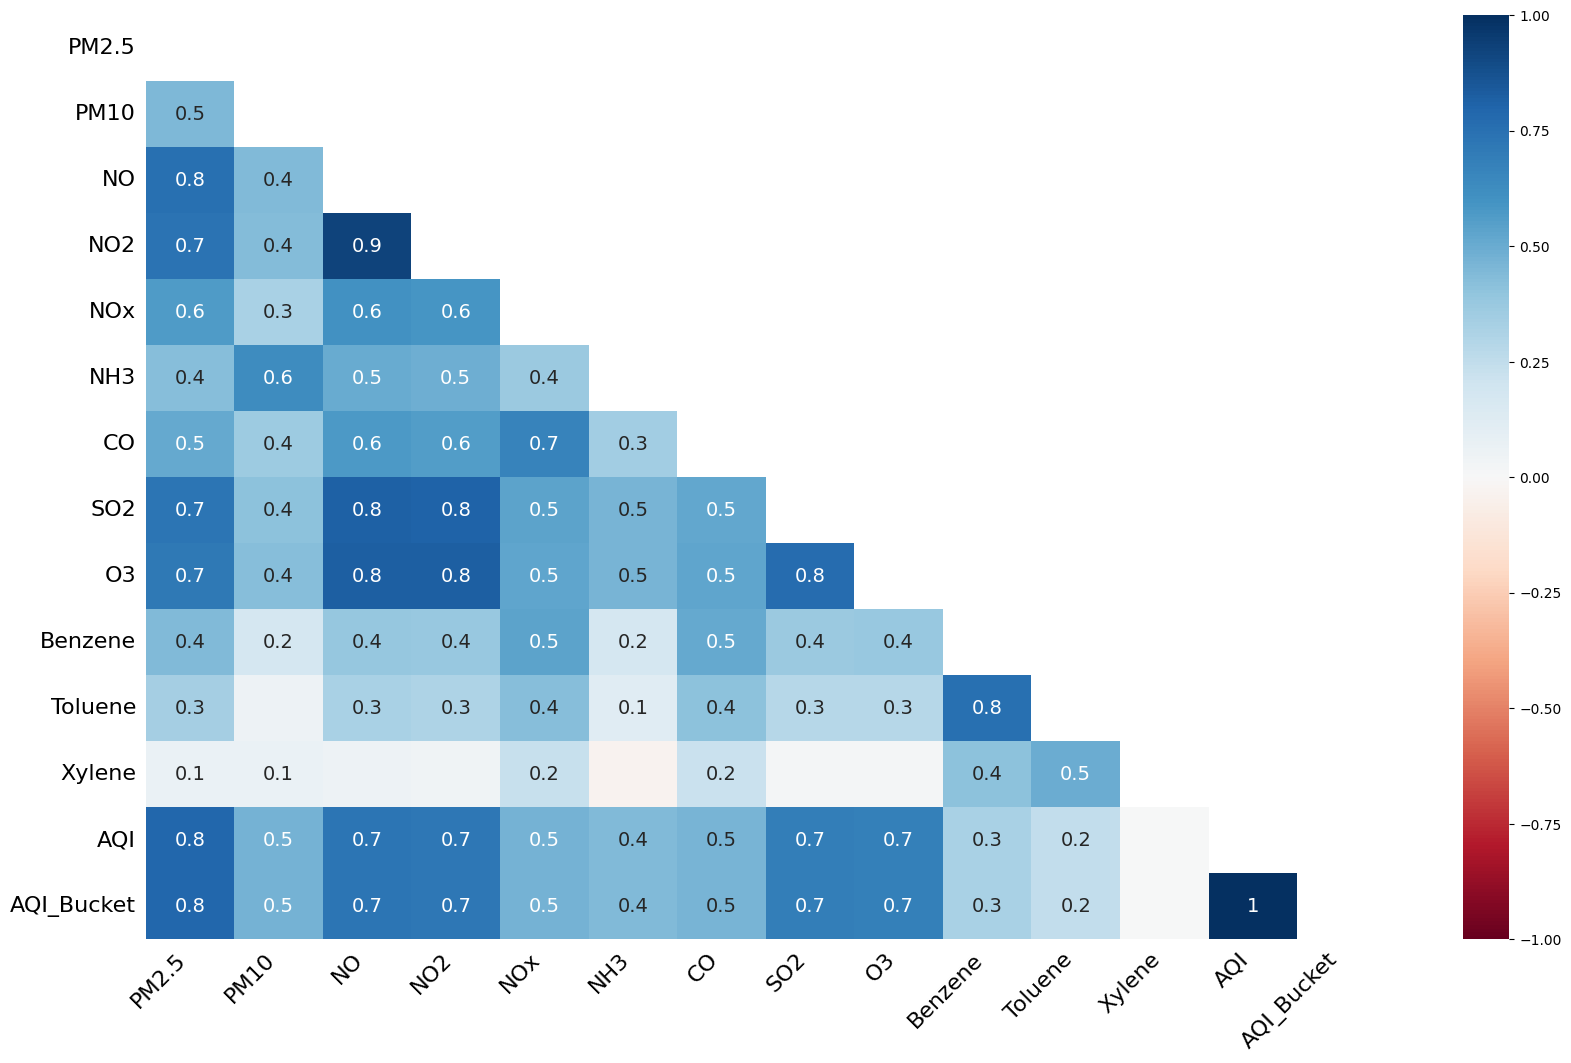

In [25]:
# missing value heatmap

msno.heatmap(df)

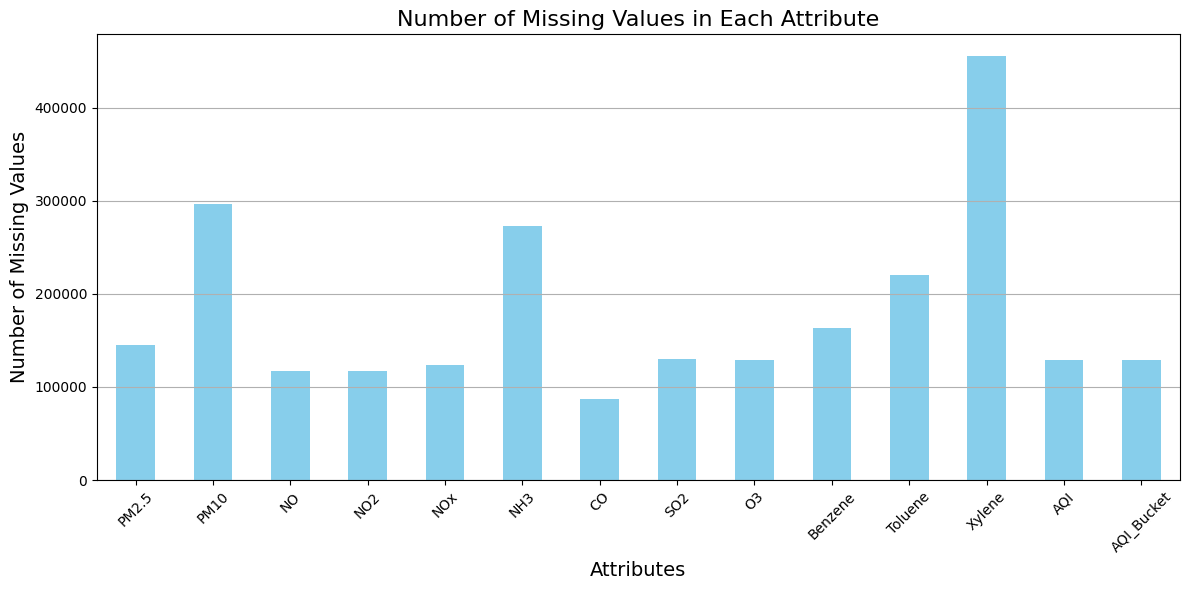

In [26]:
# number of missing values in each attribute

missing_values = df.isnull().sum()

plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Each Attribute', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


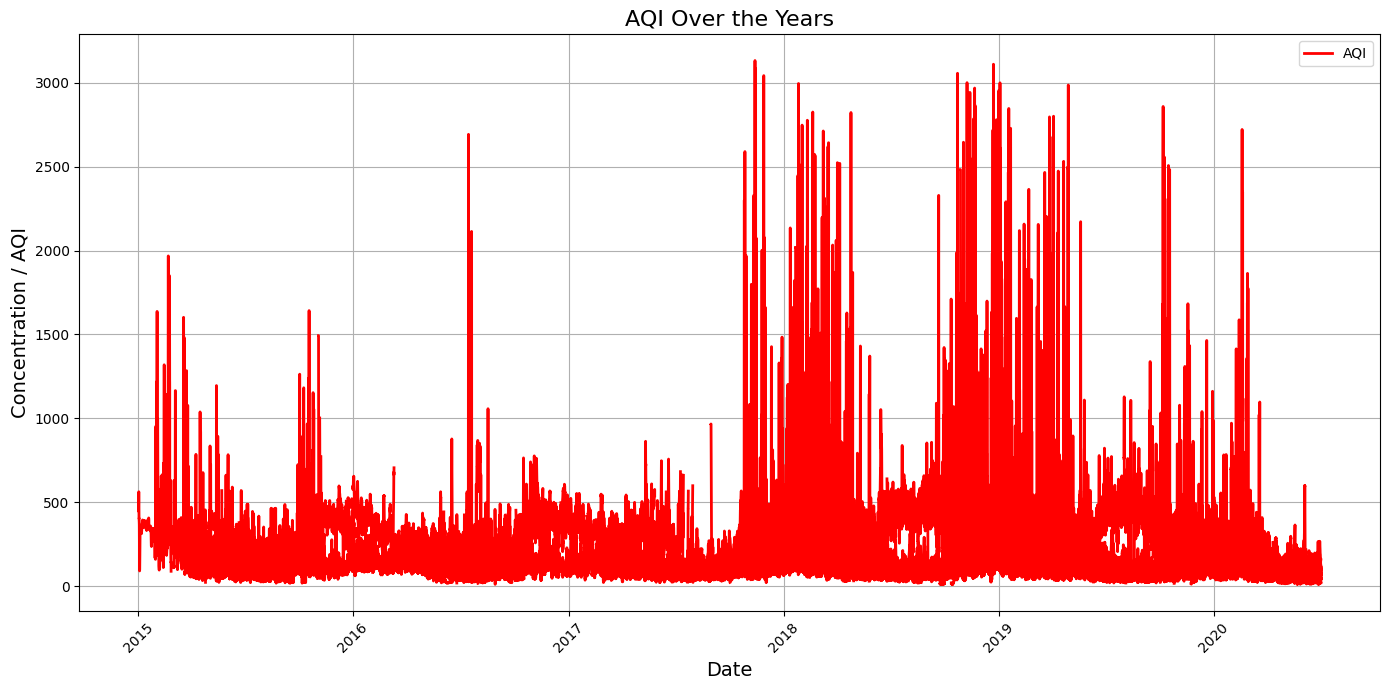

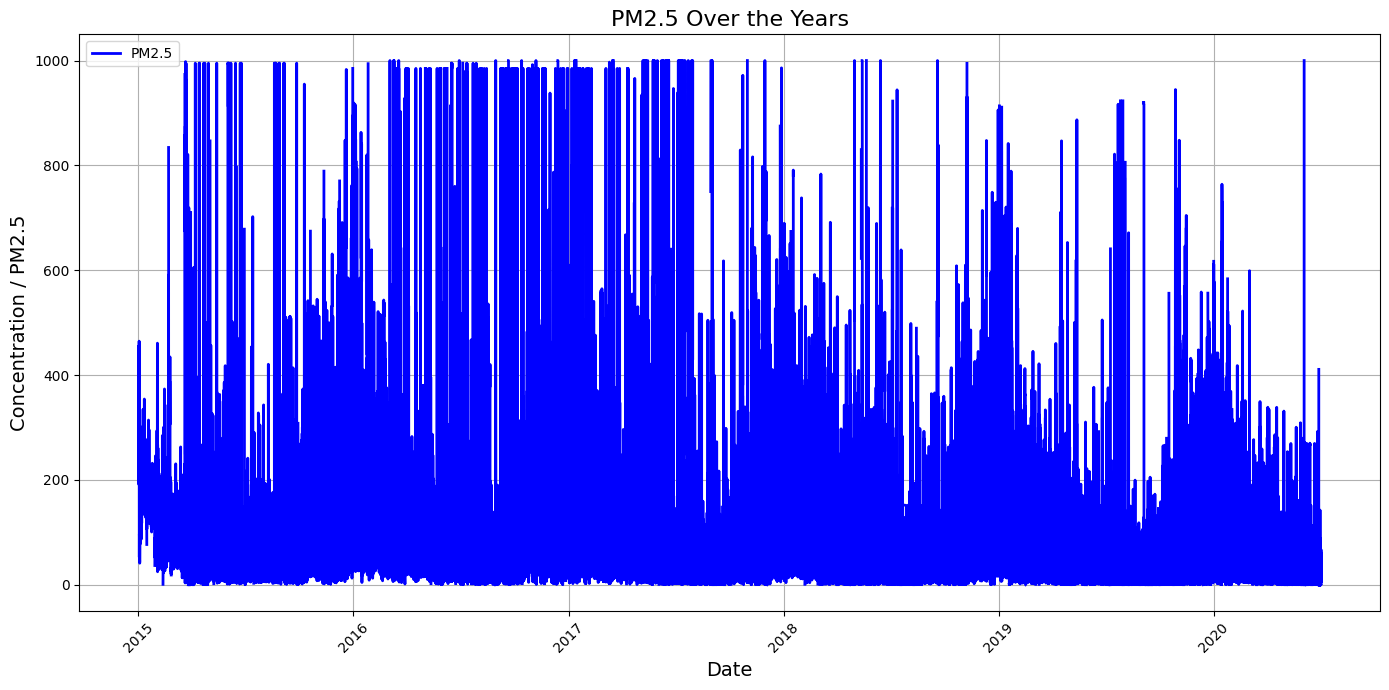

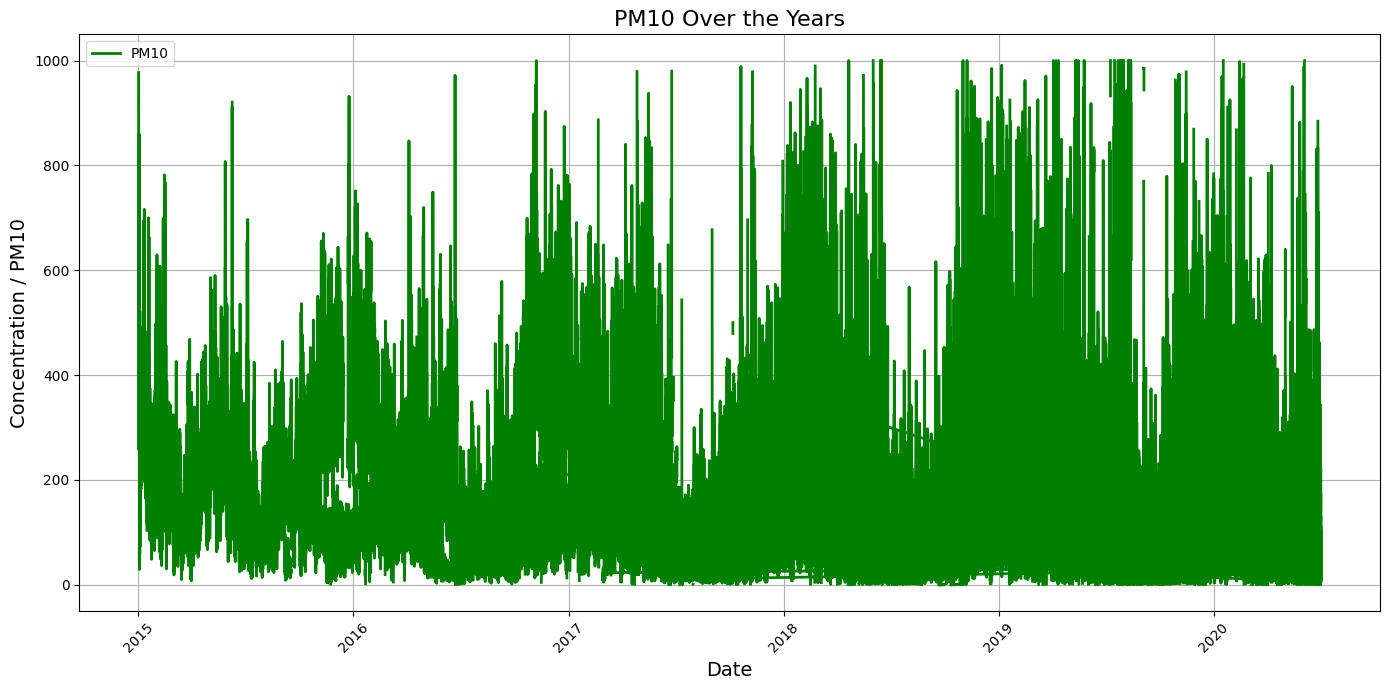

In [27]:
# timeseries plot for AQI, PM2.5 and PM10

df.set_index('Datetime', inplace=True)

def timeseries_plot(attr, title, color):
    plt.figure(figsize=(14, 7))

    plt.plot(df.index, df[attr], label=attr, color=color, linewidth=2)
    plt.title(title + ' Over the Years', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Concentration / '+title, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
timeseries_plot('AQI', 'AQI', 'red')
timeseries_plot('PM2.5', 'PM2.5', 'blue')
timeseries_plot('PM10', 'PM10', 'green')
df.reset_index(drop=False, inplace=True)

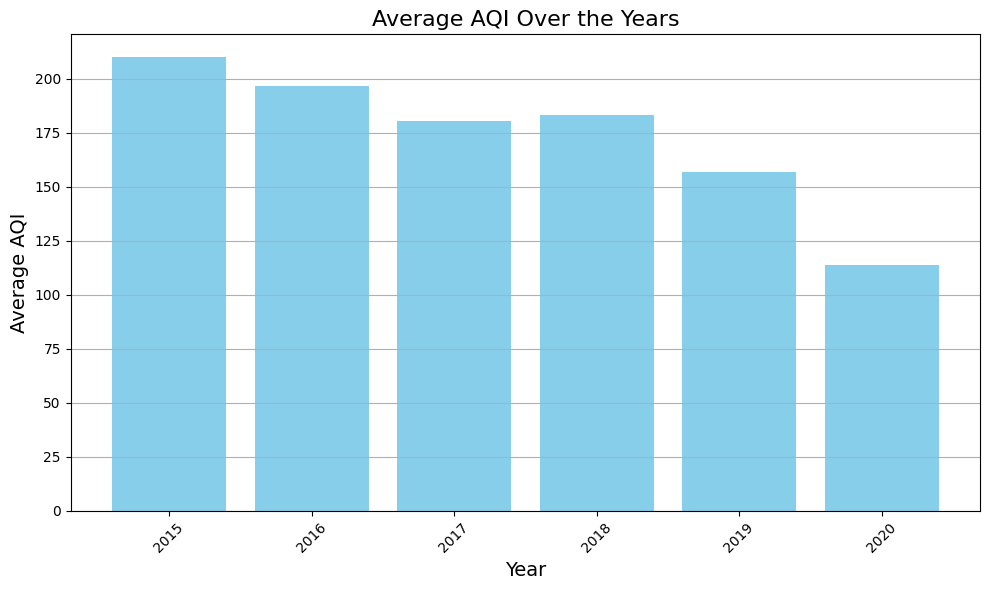

In [28]:
# average AQI over the years

average_aqi_per_year = df.groupby('Year')['AQI'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(average_aqi_per_year['Year'].astype(str), average_aqi_per_year['AQI'], color='skyblue')

plt.title('Average AQI Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

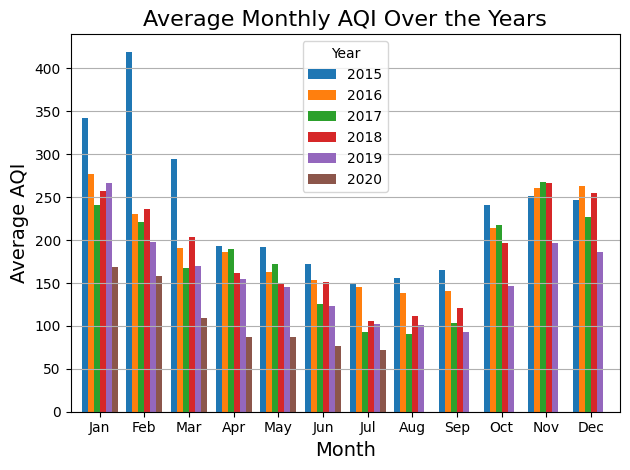

In [29]:
# average AQI for each month of each year

monthly_aqi = df.groupby(['Year', 'Month'])['AQI'].mean().reset_index()
monthly_aqi_pivot = monthly_aqi.pivot(index='Month', columns='Year', values='AQI')

plt.figure(figsize=(12, 6))

monthly_aqi_pivot.plot(kind='bar', width=0.8)

plt.title('Average Monthly AQI Over the Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.xticks(ticks=range(12), labels= months, rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

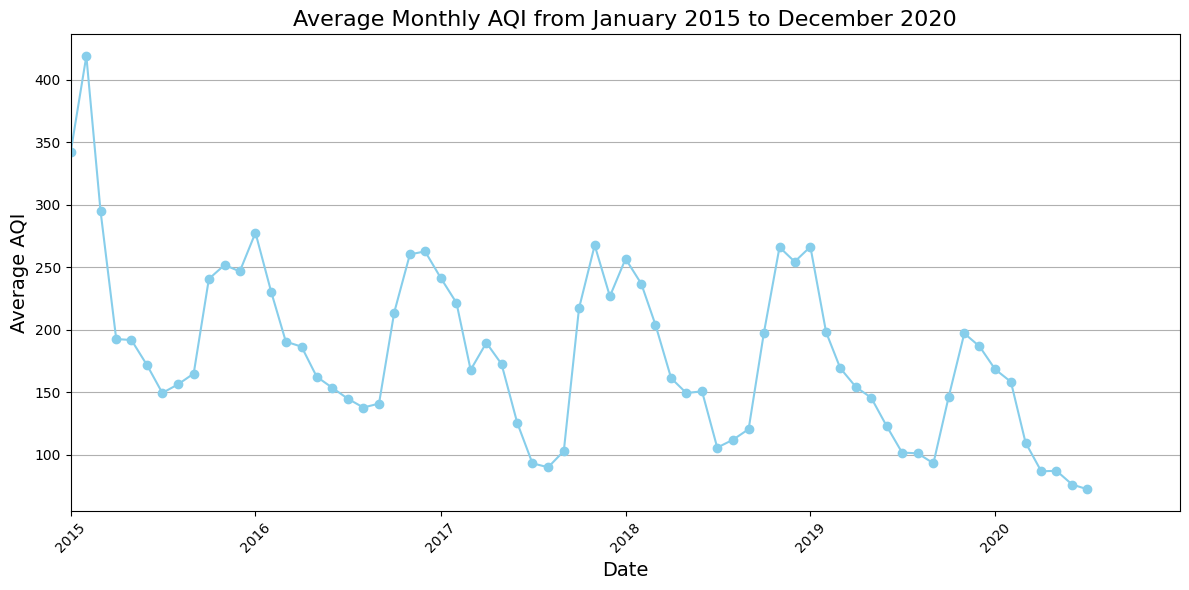

In [30]:
# line plot to showcase progression of average monthly AQI over time

monthly_aqi = df.groupby([df['Year'], df['Month']])['AQI'].mean().reset_index()
monthly_aqi['Date'] = pd.to_datetime(monthly_aqi[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(12, 6))

plt.plot(monthly_aqi['Date'], monthly_aqi['AQI'], marker='o', linestyle='-', color='skyblue')

plt.title('Average Monthly AQI from January 2015 to December 2020', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.xlim(pd.to_datetime('2015-01-01'), pd.to_datetime('2020-12-31'))
plt.tight_layout()
plt.show()

In [31]:
# list of cities

cities = df['City'].unique()
print("List of cities:")

for idx, city in enumerate(cities):
    print(f'{idx+1}. {city}')

List of cities:
1. Ahmedabad
2. Aizawl
3. Amaravati
4. Amritsar
5. Bengaluru
6. Bhopal
7. Brajrajnagar
8. Chandigarh
9. Chennai
10. Coimbatore
11. Delhi
12. Ernakulam
13. Gurugram
14. Guwahati
15. Hyderabad
16. Jaipur
17. Jorapokhar
18. Kochi
19. Kolkata
20. Lucknow
21. Mumbai
22. Patna
23. Shillong
24. Talcher
25. Thiruvananthapuram
26. Visakhapatnam


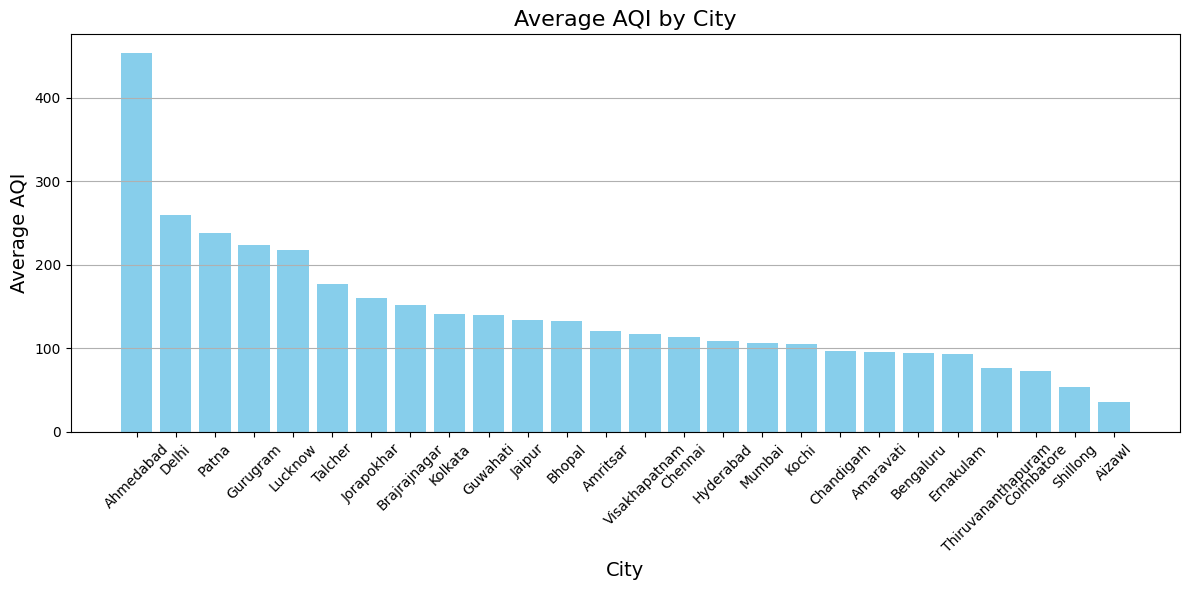

In [32]:
# average AQI of each city

city_aqi = df.groupby('City', observed=False)['AQI'].mean().reset_index()

city_aqi.sort_values(by='AQI', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(city_aqi['City'], city_aqi['AQI'], color='skyblue')
plt.title('Average AQI by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


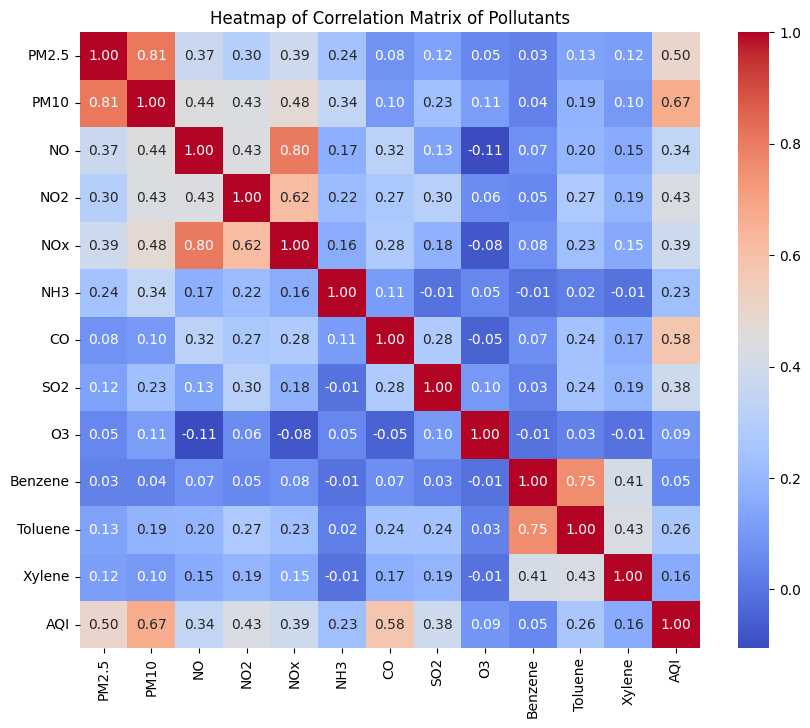

In [33]:
# heatmap

numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix of Pollutants')
plt.show()


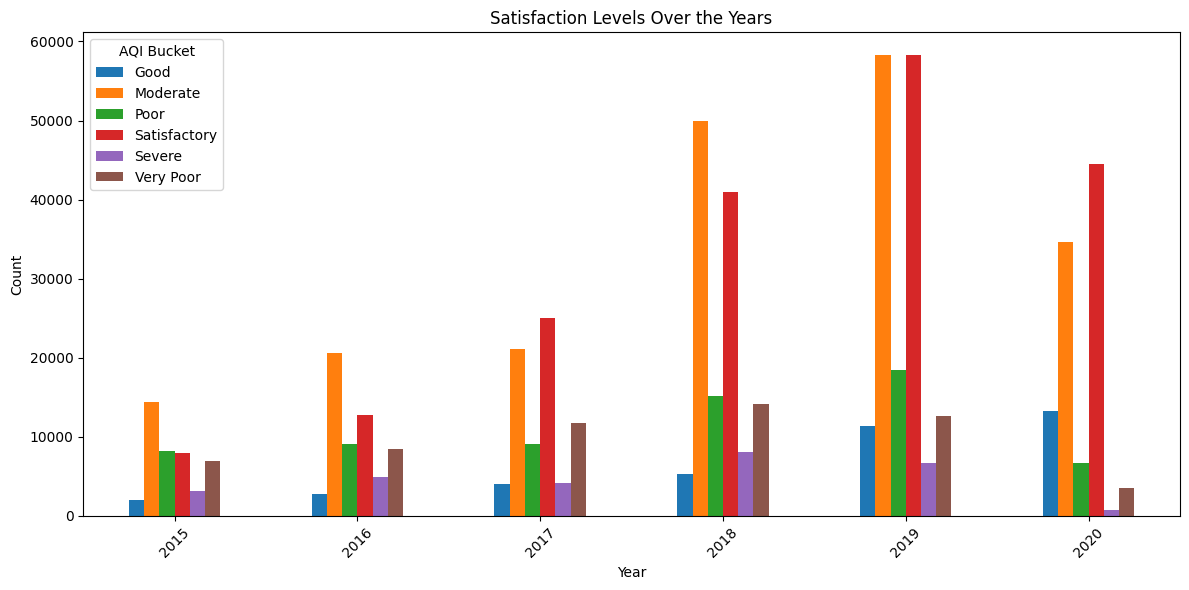

In [34]:
# average satisfaction over time

df_droppedNA = df.dropna(subset=['AQI_Bucket'])

bucket_counts = df_droppedNA.groupby(['Year', 'AQI_Bucket'], observed= False).size().unstack(fill_value=0)
bucket_counts.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Satisfaction Levels Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='AQI Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


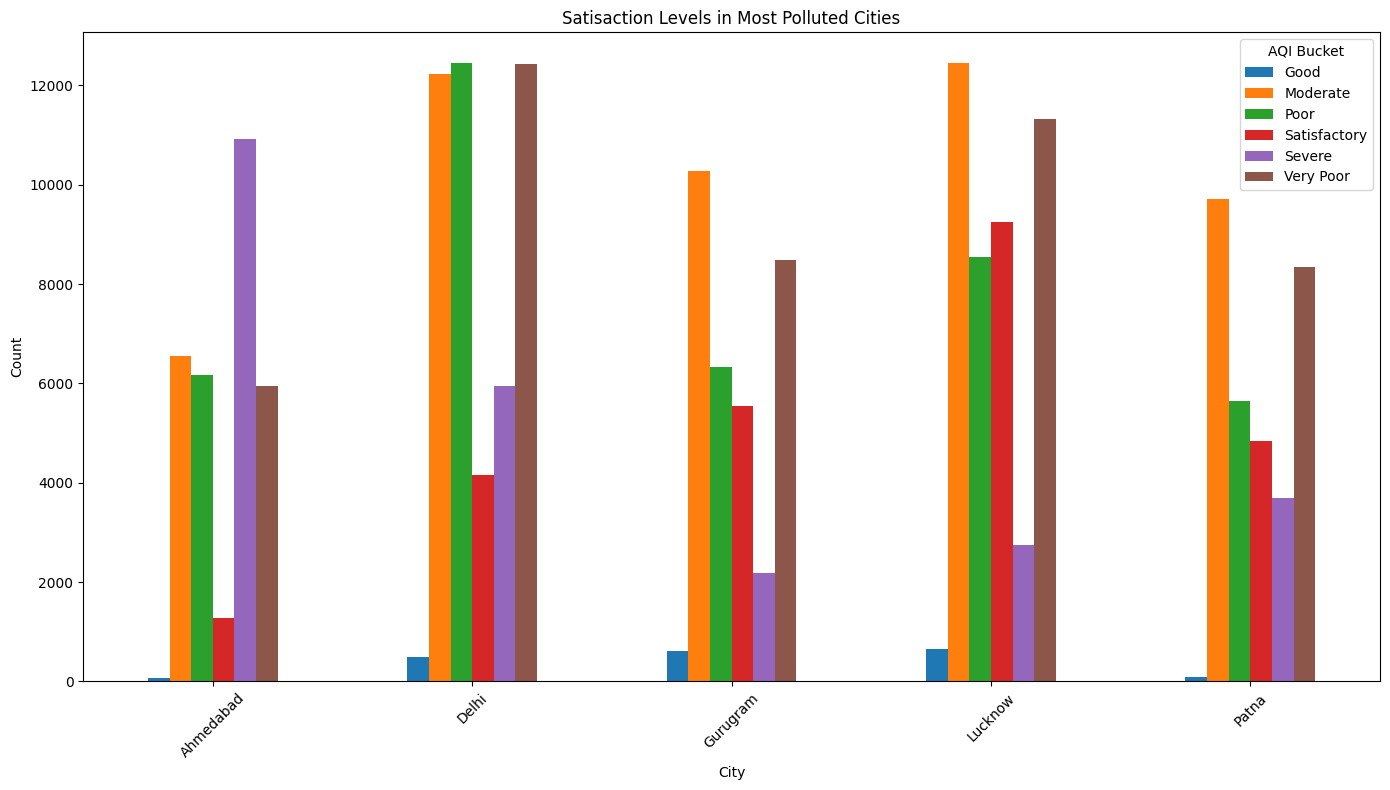

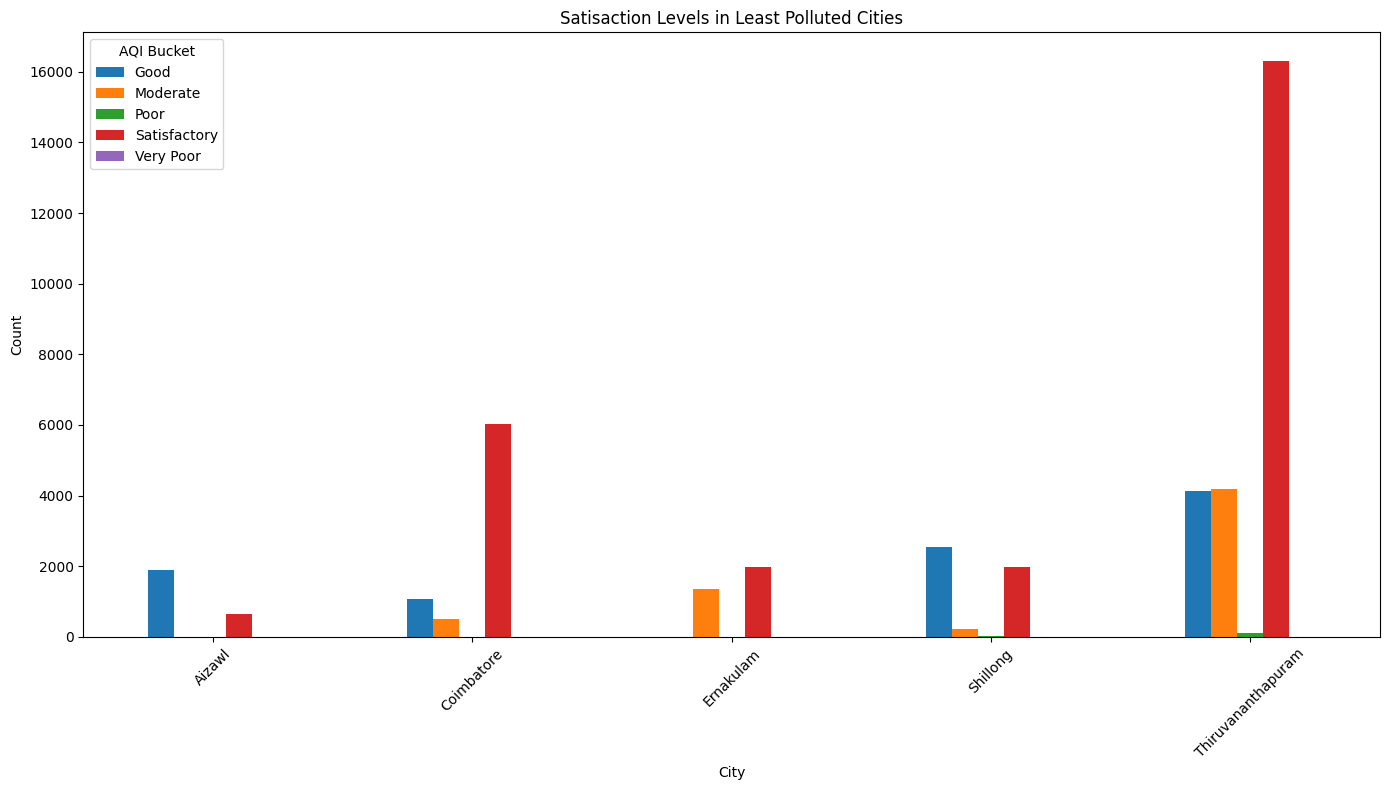

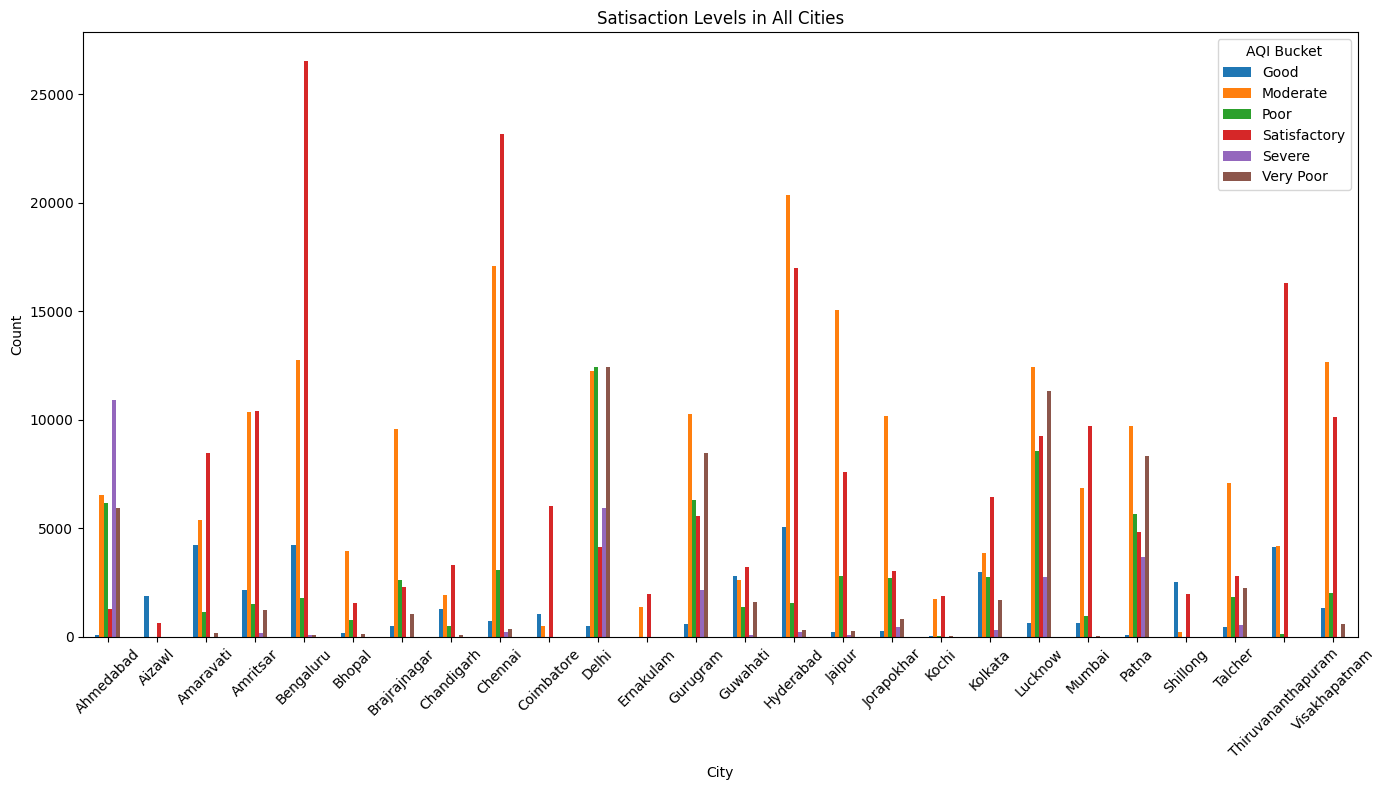

In [35]:
# average satisfaction for most pulluted and least polluted cities

def plot_satisfaction_levels(data, title):
    city_bucket_counts = data.groupby(['City', 'AQI_Bucket']).size().unstack(fill_value=0)
    city_bucket_counts.plot(kind='bar', stacked=False, figsize=(14, 8))
    plt.title('Satisaction Levels in ' + title)
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.legend(title='AQI Bucket')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

df = pd.read_csv('city_hour.csv')
df = df.dropna(subset=['AQI', 'AQI_Bucket'])

city_avg_aqi = df.groupby('City')['AQI'].mean()

most_polluted_cities_list = city_avg_aqi.nlargest(5).index.tolist()
most_polluted_cities_df = df[df['City'].isin(most_polluted_cities_list)]

least_polluted_cities_list = city_avg_aqi.nsmallest(5).index.tolist()
least_polluted_cities_df = df[df['City'].isin(least_polluted_cities_list)]


plot_satisfaction_levels(most_polluted_cities_df, 'Most Polluted Cities')
plot_satisfaction_levels(least_polluted_cities_df, 'Least Polluted Cities')
plot_satisfaction_levels(df, 'All Cities')